# Kyrillos Ashraf Gmail

## Object Detection OpenCV Python

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
Threshold=.5

In [3]:
#create class labels
classLabels = []
with open('coco.names','r') as f:
    classLabels= f.read().split('\n')
print(classLabels)    

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [4]:
print(len(classLabels))

91


In [5]:
# Loading the Model and set configuration of the model
config='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weight='frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(weight,config)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 000001D10E4D8AF0>

## For Image

Height: 1663
Width: 2500
Number of channels: 3


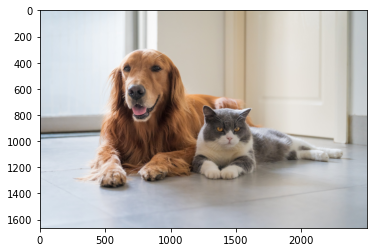

In [6]:
#read an image
img = cv2.imread('img2.jpg'.format(2))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
h, w = img.shape[:2]

# Show image shape info
print('Height: {0}\nWidth: {1}\nNumber of channels: {2}'.format(h, w, img.shape[2]))

In [7]:
ClassIndex, Confidence, Boundingbox = model.detect(img,Threshold)
print(ClassIndex)

[18 17]


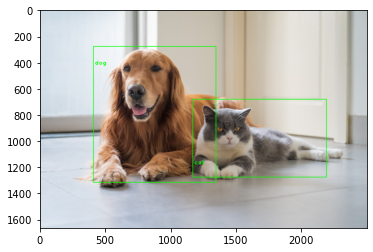

In [8]:
font = cv2.FONT_HERSHEY_PLAIN
for Ind, conf, box in zip(ClassIndex.flatten(), Confidence.flatten(), Boundingbox):
    cv2.rectangle(img, box,(0,255,0),4)
    cv2.putText(img,classLabels[Ind-1],(box[0]+10,box[0]+10), font, fontScale=3,color=(0,255,0), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.imwrite('img.jpg', img)

## For Video

In [9]:
#capturing the video
video_path='birds2.mp4'
video= cv2.VideoCapture(video_path)

if not video.isOpened():
    video= cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("Cannot open video")
    
#setting the font style

font = cv2.FONT_HERSHEY_PLAIN


In [10]:
#Reading each frame and detecting the objects in it
while True:
   
    out,frame = video.read()    
    ClassIndex, Confidence, Boundingbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for Ind, conf, box in zip(ClassIndex.flatten(), Confidence.flatten(), Boundingbox):
            if(Ind<=80):
                cv2.rectangle(frame,box,(255,0,0),4)
                cv2.putText(frame,classLabels[Ind-1],(box[0]+10,box[1]+40), 
                            font, fontScale=3,color=(0,255,0))
                cv2.putText(frame,str(Confidence*100),(box[0]+200,box[1]+30),
                            font, fontScale=3,color=(0,255,0))
                
    cv2.imshow('Object_Detection',frame)    
    if cv2.waitKey(2) & 0XFF == ord('q'):
        break
        #breaks out of the loop as soon as we press 'q' from our keyboard
video.release()
cv2.destroyAllWindows()

[16 16 16 16 16 16]
[16 16 16 16 16 16]
[16 16 16 16 16]
[16 16]
[16 16 16 16]
[16 16 16 16]
[16]
[16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16]
[16]
[16 16 16 16]
[16 16 16 16 16]
[16 16 16 16 16]
[16 16 16 16 16]
[16 16]
[16]
[16 16]
[16]
[16 16 16]
[16 16 16]
[16]
[16]
[16]
[16 16]
[16 16 16]
[16 16]
[16]
[16 16]
[16 16]
[16]
[16]
[16 16]
()
[16]
[16]
[16 16]
[16 16]
()
[16 16]
[16 16]
[16 16]
[16]
[16 16]
[16 16]
[16]
[16]
[16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16 16 16]
[16 16]
[16 16]
()
[16 16]
[16 16]
[16 16]
[16]
[16]
()
()
()
[16 16]
()
()
()
[16]
[16]
[16 16]
()
[16]
()
[16]
[16 16 16]
[16 16 16]
[16]
()
[16]
[16 16 16]
[16 16 16 16]
[16 16 16 16 16]
[16 16 16 16 16 16]
[16 16 16 16 16 16]
[16 16 16 16 16 16]
[16 16 16 16 16 16 16 16]
[16 16 16 16]
[16 16 16 16]
[16 16 16]
[16 16]
[16]
[16 16 16]
[16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16]
[16 16 16 16]
[16 16 16]
[16]
[16 16 16]
()
()
[16]
[16 16]
[16 16 16]
[16 16 16 16

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
